In [1]:
########################################################################
# This notebook demonstrates weight Prunnig                            #
# Framework used is tensorflow                                         #
########################################################################

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [3]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [4]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 70295 files belonging to 38 classes.


In [5]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [6]:
class_names = training_ds.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [7]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
## lets train our CNN
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 5)

Epoch 1/5
703/703 [==============================] - 810s 1s/step - loss: 1.0084 - accuracy: 0.7129 - val_loss: 0.4634 - val_accuracy: 0.8579
Epoch 2/5
703/703 [==============================] - 422s 600ms/step - loss: 0.3040 - accuracy: 0.9028 - val_loss: 0.3015 - val_accuracy: 0.9038
Epoch 3/5
703/703 [==============================] - 483s 687ms/step - loss: 0.1695 - accuracy: 0.9440 - val_loss: 0.3138 - val_accuracy: 0.9078
Epoch 4/5
703/703 [==============================] - 392s 557ms/step - loss: 0.0994 - accuracy: 0.9669 - val_loss: 0.3735 - val_accuracy: 0.9043
Epoch 5/5
703/703 [==============================] - 343s 487ms/step - loss: 0.0756 - accuracy: 0.9747 - val_loss: 0.4487 - val_accuracy: 0.8907


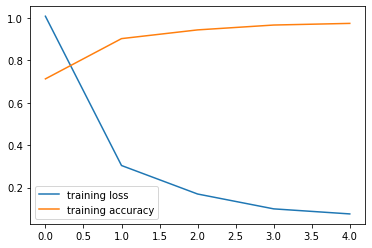

In [10]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

100


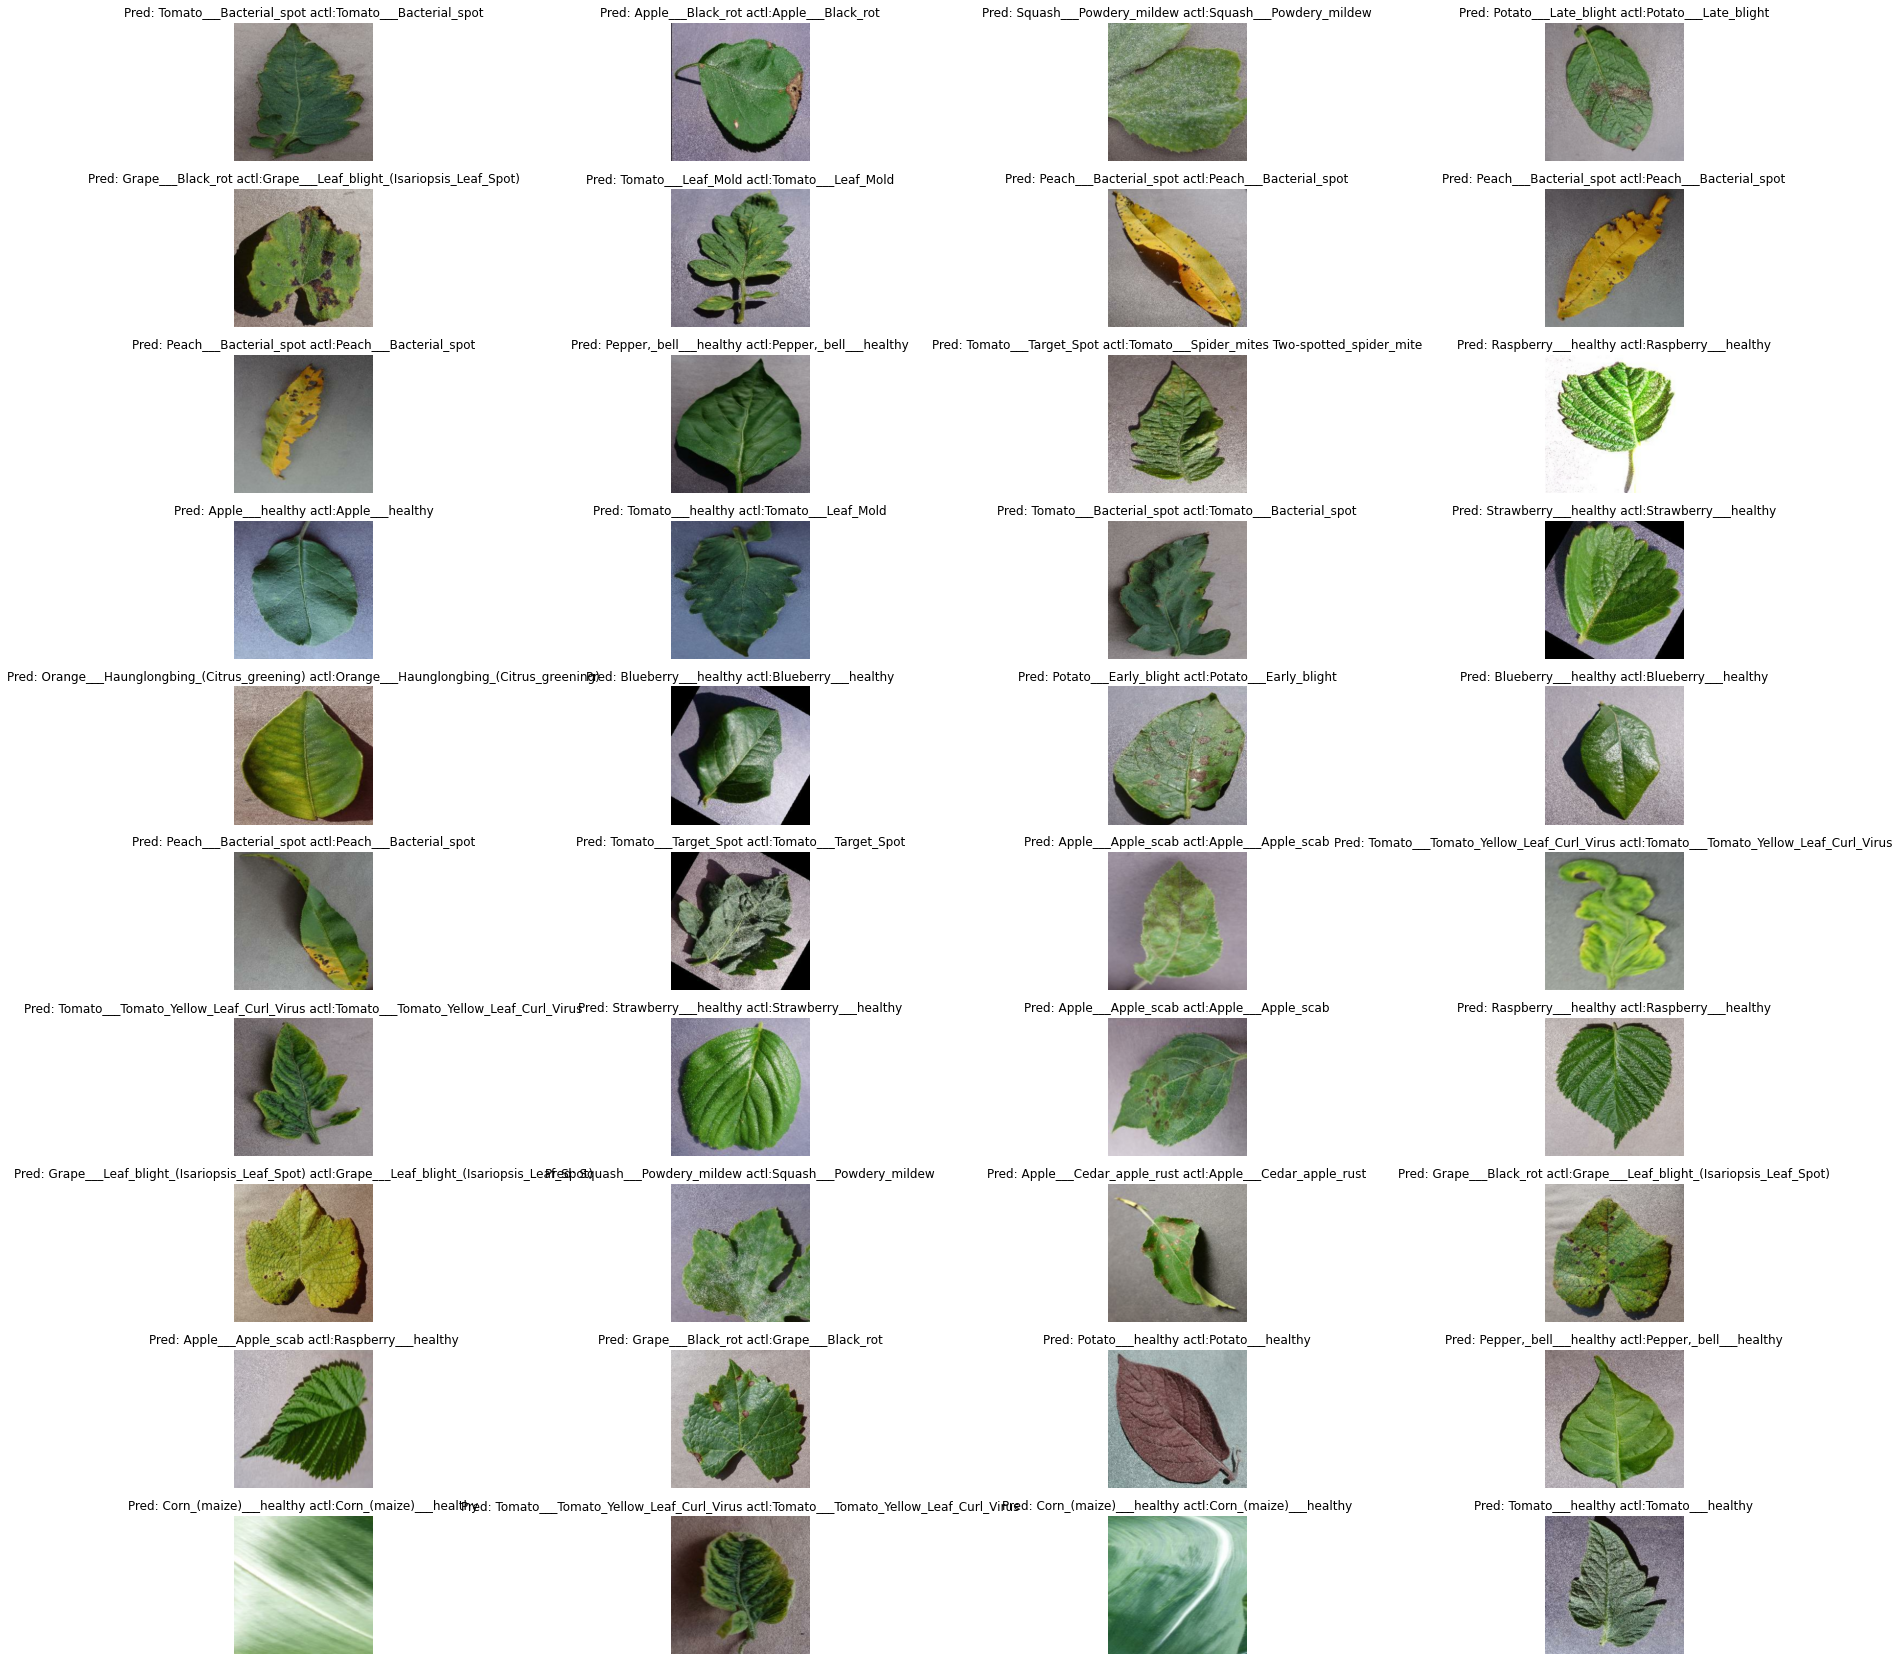

In [68]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    print(len(predictions))
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

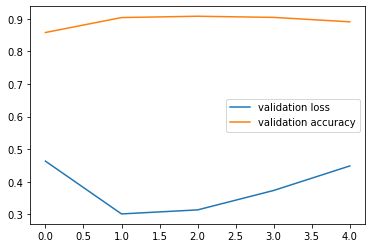

In [13]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

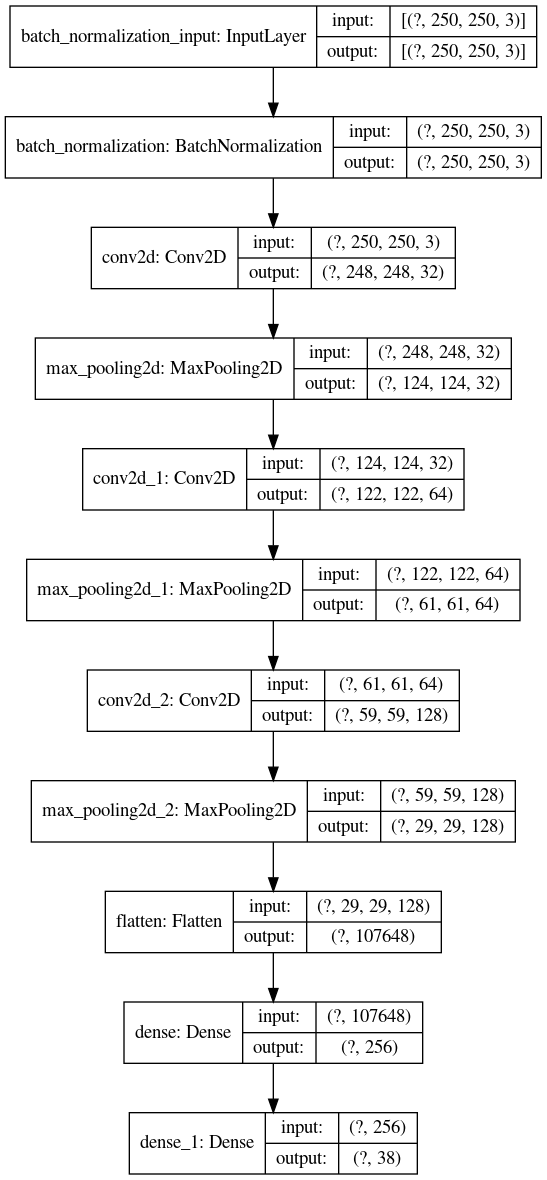

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
MyCnn.save('model.h5')

In [16]:
vars(MyCnn)

{'_self_setattr_tracking': True,
 '_trainable': True,
 '_stateful': False,
 'built': True,
 '_build_input_shape': TensorShape([None, 250, 250, 3]),
 '_saved_model_inputs_spec': TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name='batch_normalization_input'),
 '_input_spec': None,
 '_supports_masking': True,
 '_name': 'sequential',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x7f377080b0b0>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7f3769313d80>,
 '_dtype_policy': <Policy "float32", loss_scale=None>,
 '_dtype_defaulted_to_floatx': True,
 '_compute_dtype_object': tf.float32,
 '_autocast': False,
 '_layers': [<tensorflow.python.keras.engine.input_layer.InputLayer at 0x7f376c073690>,
 '_inbound_nodes': [],
 '_outbound_nodes': [],
 '_expects_training_arg': True,
 '_default_training_arg': None,
 '_expects_mask_arg':

In [73]:
channel_width = 3 # RGB
def predict_model(url):
    img = tf.keras.preprocessing.image.load_img(url,target_size=(img_width,img_height,3))
    img_array =  tf.keras.preprocessing.image.img_to_array(img)
    print(img_array.shape)
    img_array = np.expand_dims(img_array, axis=0)
    result = MyCnn.predict(img_array)
    itemindex = np.where(result==np.max(result))
    return "probability:"+str(np.max(result))+"\n"+class_names[itemindex[1][0]]


In [74]:
img_url = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/ff83852f-65e0-4981-8c66-6b86d34b32c2___RS_Erly.B 9582_flipTB.JPG"
predict_model(img_url)

(250, 250, 3)


'probability:0.98036367\nTomato___Early_blight'

<a href="model.h5">Download</a>

In [31]:
import unittest

def sum(arr):
        _sum=0
        for a in arr:
            _sum+=a
        return _sum

class UnitTest(unittest.TestCase):
    def test_sum_list(self):
        expected=6
        actual=sum([1,2,3])
        self.assertEqual(expected,actual)
    def test_sum_tuple(self):
        expected=6
        actual=sum((1,2,3))
        self.assertEqual(expected,actual)
    def test_raise_dict_exception(self):
        with self.assertRaises(TypeError):
            sum({})
    def test_dict(self):
        expected=1
        actual={1: "hi"}
        self.assertEqual(expected,sum(actual))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_dict (__main__.UnitTest) ... ok
test_raise_dict_exception (__main__.UnitTest) ... FAIL
test_sum_list (__main__.UnitTest) ... ok
test_sum_tuple (__main__.UnitTest) ... ok

FAIL: test_raise_dict_exception (__main__.UnitTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-31-b97eb198b77c>", line 20, in test_raise_dict_exception
    sum({})
AssertionError: TypeError not raised

----------------------------------------------------------------------
Ran 4 tests in 0.006s

FAILED (failures=1)
